In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import seaborn as sns

In [2]:
# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv("city_data.csv").dropna()
ride_data_df = pd.read_csv("ride_data.csv").dropna()

In [3]:
# Combine the data into a single dataset
# Display the data table for preview
ridesharing_df = city_data_df.merge(ride_data_df, how='left', on='city')
ridesharing_df.head(10)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


In [4]:
#Bubble Plot of ride sharing data
# Obtain the x and y coordinates for each of the three city types
x_axis=ridesharing_df.groupby(by='city')["ride_id"].count()
y_axis=ridesharing_df.groupby(by='city')["fare"].mean()
z_list=ridesharing_df.drop_duplicates(subset='city', keep='first').set_index('city')["driver_count"]
print(z_list)
sizes=('z_list')*8000
type_list = ridesharing_df.drop_duplicates(subset='city', keep='first').set_index('city')['type']
color_list = {'Urban':'Coral', 'Suburban':'SkyBlue', 'Rural':'Gold'}
ridesharing_df = pd.DataFrame({'x':x_axis,'y':y_axis, 'City Type':type_list})

city
Richardfort             38
Williamsstad            59
Port Angela             67
Rodneyfort              34
West Robert             39
West Anthony            70
West Angela             48
Martinezhaven           25
Karenberg               22
Barajasview             26
Robertport              12
Joneschester            39
Leahton                 17
West Christopherberg    32
Johnton                 27
Reynoldsfurt            67
Port David               7
New Kimberlyborough     33
Carriemouth             52
Rogerston               25
Jerryton                64
Loganberg               23
Simpsonburgh            21
Port Frank              23
South Latoya            10
West Samuelburgh        73
Grahamburgh             61
West Patrickchester     25
North Madeline          19
South Jack              46
                        ..
Barronchester           11
Brandonfort             10
East Danielview         22
East Marymouth           5
Mezachester             14
Lewisland              

Text(1, 0.75, 'Note: Circle size correlates with driver count per city')

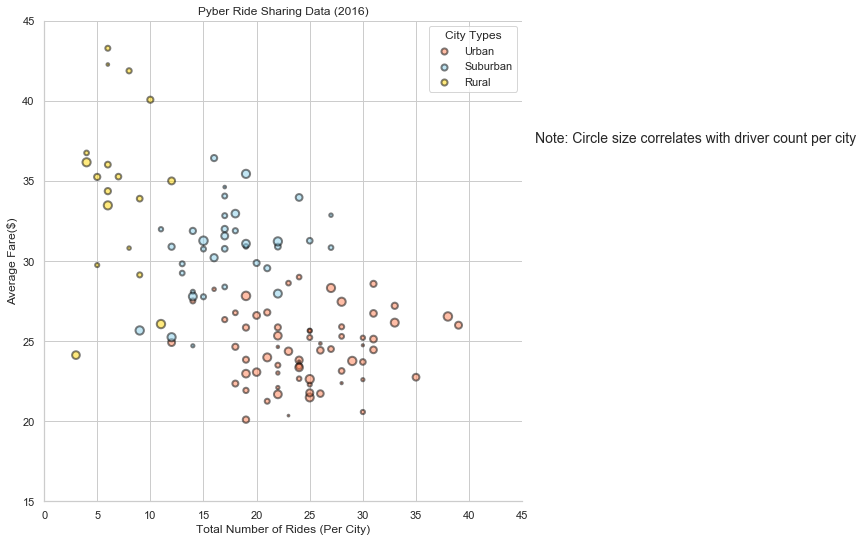

In [6]:
# Build the scatter plots for each city types
sns.set(style='whitegrid', context='notebook')
bubblePlot=sns.lmplot(x='x', y='y', data=ridesharing_df, hue='City Type', palette=color_list,\
                      fit_reg=False, height=7.5,\
                      legend=False,\
                      scatter_kws={'s':z_list, 'alpha':0.5, 'edgecolors':'black', 'linewidths':2})
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.legend(loc="upper right", title="City Types")
plt.xlim(0,45)
plt.ylim(15,45)
textstr = 'Note: Circle size correlates with driver count per city'
plt.gcf().text(1, 0.75, textstr, fontsize=14)

In [7]:
# Save Figure
plt.savefig("pyber_ridesharing_bubbleplot.png")
#plt.savefig("../Images/pyber_ridesharing_bubbleplot.png")

<Figure size 432x288 with 0 Axes>

In [8]:
# Show figure
plt.show()

In [9]:
ridesharing_df = city_data_df.merge(ride_data_df, how='left', on='city')
ridesharing_df.head(10)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


In [10]:
#Total fares by city type
# Calculate Type Percents
city_type_percentages_df = ridesharing_df[["type","fare"]]
type_group = city_type_percentages_df.groupby(["type"])
summ_fares_df = type_group.sum()
total_fares = ridesharing_df["fare"].sum()
fares_citytype_percent_df = ((summ_fares_df/total_fares) * 100).round(1)
print("Total fares:", total_fares)
print("% of Total Fares by City Type:", fares_citytype_percent_df)

Total fares: 63538.64
% of Total Fares by City Type:           fare
type          
Rural      6.8
Suburban  30.5
Urban     62.7


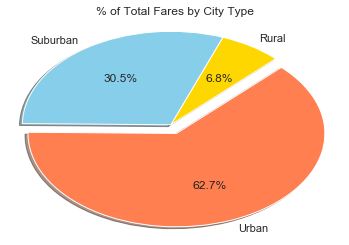

<Figure size 432x288 with 0 Axes>

In [11]:
# Build Pie Chart
fares = ["6.8", "30.5","62.7"]
type = ["Rural","Suburban","Urban"]
colors = ["Gold", "SkyBlue", "Coral"]
explode = (0, 0, 0.1)

plt.title("% of Total Fares by City Type")
plt.pie(fares, explode=explode, labels=type, colors=colors, autopct="%1.1f%%", shadow=True, startangle=45)
plt.axis("tight")
plt.show()

# Save Figure
plt.savefig("pyber_percent_totalfarescitytype_piechart.png")

In [12]:
# Show Figure
plt.show()

Total rides: 2375
% of Total Rides by City Type:           ride_id
type             
Rural         5.3
Suburban     26.3
Urban        68.4


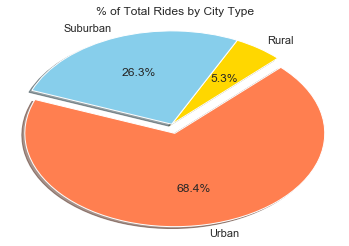

<Figure size 432x288 with 0 Axes>

In [13]:
#Total rides by city type
# Calculate Ride Percents
city_type_totalrides_df = ridesharing_df[["type","ride_id"]]
type_group = city_type_totalrides_df.groupby(["type"])
summ_rides_df = type_group.count()
total_rides = ridesharing_df["ride_id"].count()
rides_citytype_percent_df = ((summ_rides_df/total_rides) * 100).round(1)
print("Total rides:", total_rides)
print("% of Total Rides by City Type:", rides_citytype_percent_df)

# Build Pie Chart
rides = ["5.3", "26.3","68.4"]
type = ["Rural","Suburban","Urban"]
colors = ["Gold", "SkyBlue", "Coral"]
explode = (0, 0, 0.1)

plt.title("% of Total Rides by City Type")
plt.pie(rides, explode=explode, labels=type, colors=colors, autopct="%1.1f%%", shadow=True, startangle=45)
plt.axis("tight")
plt.show()


# Save Figure
plt.savefig("pyber_percent_totalridescitytype_piechart.png")

In [14]:
# Show Figure
plt.show()

In [15]:
ridesharing_df = city_data_df.merge(ride_data_df, how='left', on='city')
ridesharing_df.head(10)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


Total drivers: 2973
% of Total Drivers by City Type:           driver_count
type                  
Rural              2.6
Suburban          16.5
Urban             80.9


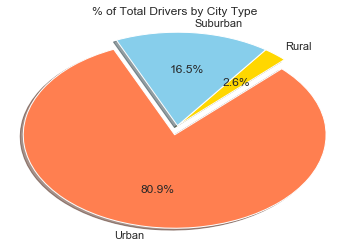

<Figure size 432x288 with 0 Axes>

In [16]:
#Total drivers by city type
# Calculate Driver Percents
city_type_totaldrivers_df = ridesharing_df.drop_duplicates(subset='city', keep='first').set_index('city')[["driver_count","type"]]
type_group = city_type_totaldrivers_df.groupby(["type"])
summ_drivers_df = type_group.sum()
total_drivers = city_type_totaldrivers_df["driver_count"].sum()
drivers_citytype_percent_df = ((summ_drivers_df/total_drivers) * 100).round(1)
print("Total drivers:", total_drivers)
print("% of Total Drivers by City Type:", drivers_citytype_percent_df)


# Build Pie Chart# Show Figure
drivers = ["2.6", "16.5","80.9"]
type = ["Rural","Suburban","Urban"]
colors = ["Gold", "SkyBlue", "Coral"]
explode = (0, 0, 0.1)

plt.title("% of Total Drivers by City Type")
plt.pie(drivers, explode=explode, labels=type, colors=colors, autopct="%1.1f%%", shadow=True, startangle=45)
plt.axis("tight")
plt.show()


#plt.show()s
plt.show()

# Save Figure
plt.savefig("pyber_percent_totaldriverscitytype_piechart.png")


In [ ]:
#Three observable trends based on the data:
# 1. Total Fares and Total Rides percentages are proportionate for each of the three city types. That is urban cities had
# roughly the same percentage of total fares (62.7%) as they did for total rides (68.4%), suburban cities had roughly the
# same percentage of total fares (30.5%) as they did for total rides (26.3%) and likewise for rural cites (6.8% and 5.3%).
# However, while urban cities are responsible for approximately 2/3 of total fares (62.7%) and total rides (68.4%), they
# needed more than 3/4 (80.9%) of the total number of drivers to meet the ride demand.
# 
# 2. The total number of rides in rural cities are lower relative to urban and suburban cities, but the average fare is more
# expensive in rural cities than it is in urban and suburban cities.
#
# 3. The total number of rides is generally higher and the average fares lower in urban cities than in suburban and rural
# cities. This may be due to suburban and rural rides being longer as there may be more distance between the starting points
# and the destinations. Further data is needed to support this theory.